In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)


(39717, 111)


# Data Cleanup

### Remove all columns having all null

In [4]:
df.isnull().sum()
df.dropna(how='all',axis=1,inplace=True)

In [5]:
cols_nulls_per=df.isnull().sum()/df.shape[0]*100
cols_to_drop = list(cols_nulls_per[cols_nulls_per>5].index)
cols_to_drop

['emp_title',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d']

### Remove all columns with nulls>25%

In [6]:
cols_with_null_greater_than_twentyfive_per=list(cols_nulls_per[cols_nulls_per>25].index)
print(cols_with_null_greater_than_twentyfive_per)

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [7]:
df.drop(cols_with_null_greater_than_twentyfive_per,axis=1,inplace=True)
df.shape

(39717, 53)

### Other columns having nulls

In [8]:
null_columns = df.isnull().sum()
null_columns[null_columns >0]
null_columns = null_columns[null_columns >0]
print(null_columns)

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64


### Removing all categorial columns were value counts are too much thus not useful

In [9]:
columns = list(df.columns)
df_temp = pd.DataFrame({'col_name':columns,'null_count':list(df.isnull().sum().values)})
df_temp['value_count'] = df_temp['col_name'].apply(lambda x:df[x].value_counts().size)
df_temp['dtype'] = df_temp['col_name'].apply(lambda x:type(df[x][0]))
df_temp

,col_name,null_count,value_count,dtype
0,id,0,39717,<class 'numpy.int64'>
1,member_id,0,39717,<class 'numpy.int64'>
2,loan_amnt,0,885,<class 'numpy.int64'>
3,funded_amnt,0,1041,<class 'numpy.int64'>
4,funded_amnt_inv,0,8205,<class 'numpy.float64'>
5,term,0,2,<class 'str'>
6,int_rate,0,371,<class 'str'>
7,installment,0,15383,<class 'numpy.float64'>
8,grade,0,7,<class 'str'>
9,sub_grade,0,35,<class 'str'>


In [10]:
df.drop(['emp_title','title','id','member_id','url'],axis=1,inplace=True)

In [11]:
df.shape

(39717, 48)

### Removing all columns were value counts is just one

In [12]:
df_temp1 = df_temp[df_temp['value_count']==1]
df_temp1

,col_name,null_count,value_count,dtype
17,pymnt_plan,0,1,<class 'str'>
32,initial_list_status,0,1,<class 'str'>
45,collections_12_mths_ex_med,56,1,<class 'numpy.float64'>
46,policy_code,0,1,<class 'numpy.int64'>
47,application_type,0,1,<class 'str'>
48,acc_now_delinq,0,1,<class 'numpy.int64'>
49,chargeoff_within_12_mths,56,1,<class 'numpy.float64'>
50,delinq_amnt,0,1,<class 'numpy.int64'>
52,tax_liens,39,1,<class 'numpy.float64'>


In [13]:
list(df_temp1['col_name'].values)

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
df.drop(list(df_temp1['col_name'].values),axis=1,inplace=True)

In [15]:
df.shape


(39717, 39)

### Business needs to forcast target variable 'loan_status' wrt variables we have before client is onboarded,thus removing columns were data is generated only ones client is onboarded

In [16]:
drop_cols = ['issue_d','last_credit_pull_d','earliest_cr_line','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','revol_bal','revol_util']
df_temp = df[drop_cols]
df_temp

,issue_d,last_credit_pull_d,earliest_cr_line,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,revol_bal,revol_util
0,Dec-11,May-16,Jan-85,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,13648,83.70%
1,Dec-11,Sep-13,Apr-99,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1687,9.40%
2,Dec-11,May-16,Nov-01,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,2956,98.50%
3,Dec-11,Apr-16,Feb-96,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,5598,21%
4,Dec-11,May-16,Jan-96,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,27783,53.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,Jul-07,Jun-10,Nov-90,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,7274,13.10%
39713,Jul-07,Jul-10,Dec-86,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,8847,26.90%
39714,Jul-07,Jun-07,Oct-98,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,9698,19.40%
39715,Jul-07,Jun-07,Nov-88,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,85607,0.70%


In [17]:
df.drop(drop_cols,axis=1,inplace=True)
df.shape

(39717, 23)

### Business needs to analyse target variable 'loan_status' for values 'Fully Paid','Charged Off', this deleting all rows where 'loan_status' is other than these 2 values

In [18]:
df.drop(list(df[df['loan_status']=='Current'].index),axis=0,inplace=True)
df.shape

(38577, 23)

### Handling rest of the null values

In [19]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

### imputing values for pub_rec_bankruptcies

In [20]:
df['pub_rec_bankruptcies'].mode()[0]
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0],inplace=True) 

### removing rows with null for emp_length because imputing them may introduce bias

In [21]:
df.dropna(subset=['emp_length'],inplace=True) 
df.emp_length.isnull().sum()

0

In [22]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

### Fixing datatypes of various columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  object 
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  loan_status           37544 non-null  object 
 13  purpose               37544 non-null  object 
 14  zip_code              37544 non-null  object 
 15  addr_state            37

In [24]:
# def pertofloat(x):
#     if pd.isna(x):
#         return x
#     else:
#         return float(x.split('%')[0])

# df.int_rate = df.int_rate.apply(pertofloat)
df.int_rate = df.int_rate.str.replace('%','').astype('float')

In [25]:
df.shape

(37544, 23)

# 2. Univariate Analysis and removing outliers

## 2.1 Analysing Numeric Variables

### 2.1.1 annual_inc

0.50     60000.0
0.75     83000.0
0.90    116672.4
0.95    142000.0
0.97    166213.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64


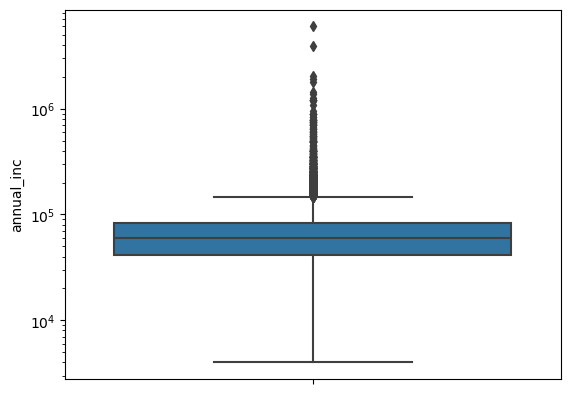

In [26]:
ax = sns.boxplot(y='annual_inc', data=df)
plt.yscale('log')
ax.plot()

quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
print(quantile_info)

In [27]:
def calc_wiskers(colname,data_frame,upper_quantile=0.75,lower_quantile=0.25):
    q1 = df[colname].quantile(lower_quantile)
    q3 = df[colname].quantile(upper_quantile)
    iqr = q3-q1
    lower_wisk = q1 - 1.5*iqr
    upper_wisk = q3 + 1.5*iqr
    return lower_wisk,upper_wisk

lower_wisk,upper_wisk = calc_wiskers('annual_inc',df)
print(lower_wisk,upper_wisk)

-22000.0 146000.0


### getting rid of outliers for annual_inc

In [28]:
df = df[df.annual_inc<=146000]
df = df[df.annual_inc>=-22000]
df.shape

(35814, 23)

[]

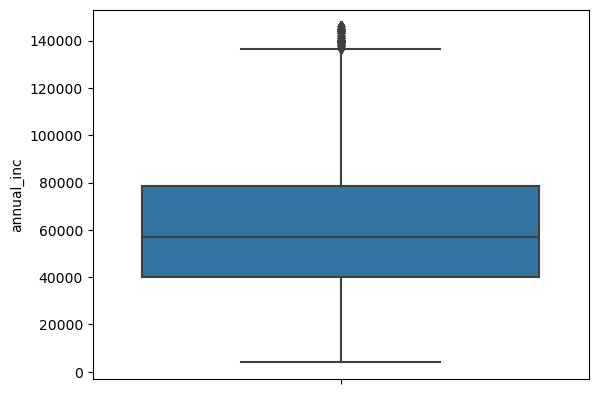

In [29]:
ax = sns.boxplot(y='annual_inc', data=df)
# plt.yscale('log')
ax.plot()

In [30]:
df_fullypaid = df[df['loan_status']=='Fully Paid']
df_chargedoff = df[df['loan_status']=='Charged Off']

### 2.1.2 funded_amnt

-9100.0 28500.0
732
0


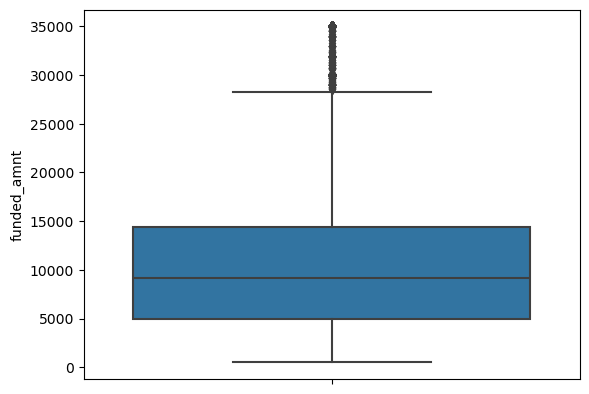

In [31]:
ax = sns.boxplot(y='funded_amnt', data=df)
ax.plot()

lower_wisk,upper_wisk = calc_wiskers('funded_amnt',df)
print(lower_wisk,upper_wisk)
print(len(df[df.funded_amnt>=upper_wisk]))
print(len(df[df.funded_amnt<=lower_wisk]))

### getting rid of outliers for funded_amnt

In [32]:
df = df[df.funded_amnt<=upper_wisk]
df = df[df.funded_amnt>=lower_wisk]
df.shape

(35082, 23)

[]

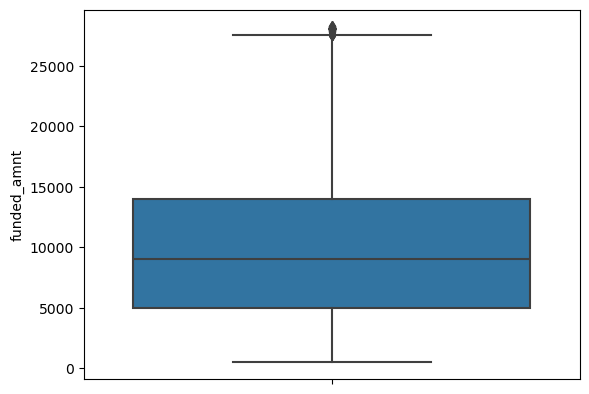

In [33]:
ax = sns.boxplot(y='funded_amnt', data=df)
ax.plot()

### 2.1.3 loan_amnt

### ignoring loan_amnt for analysis as values are very similar to funded_amnt

In [34]:
df_temp = df
df_temp['diff_loan&fundedamt'] = df_temp['loan_amnt'] - df_temp['funded_amnt']
print(df_temp['diff_loan&fundedamt'].describe())
df.drop('diff_loan&fundedamt',axis=1,inplace=True)

count    35082.000000
mean       253.853116
std       1359.836618
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      21025.000000
Name: diff_loan&fundedamt, dtype: float64


### 2.1.4 funded_amnt_inv

### ignoring funded_amnt_inv for analysis as values are very similar to funded_amnt

In [35]:
df_temp['diff_funded&fundedinvamt'] = df_temp['funded_amnt'] - df_temp['funded_amnt_inv']
print(df_temp['diff_funded&fundedinvamt'].describe())
df.drop('diff_funded&fundedinvamt',axis=1,inplace=True)

count    35082.000000
mean       541.185915
std       1991.244753
min          0.000000
25%          0.000000
50%          0.000000
75%        150.000000
max      24925.012476
Name: diff_funded&fundedinvamt, dtype: float64


### 2.1.5 int_rate

0.9449999999999994 22.265
59
0


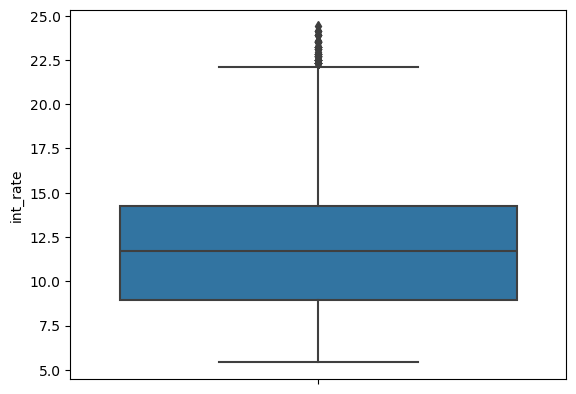

In [36]:
ax = sns.boxplot(y='int_rate', data=df)
ax.plot()

lower_wisk,upper_wisk = calc_wiskers('int_rate',df)
print(lower_wisk,upper_wisk)
print(len(df[df.int_rate>=upper_wisk]))
print(len(df[df.int_rate<=lower_wisk]))

### getting rid of outliers

In [37]:
df = df[df.int_rate<upper_wisk]
df = df[df.int_rate>lower_wisk]
df.shape

(35023, 23)

[]

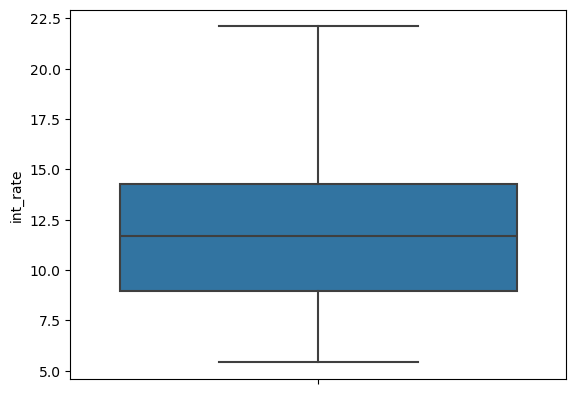

In [38]:
ax = sns.boxplot(y='int_rate', data=df)
ax.plot()

### 2.1.6 installment

-193.0675 756.4725
905
0


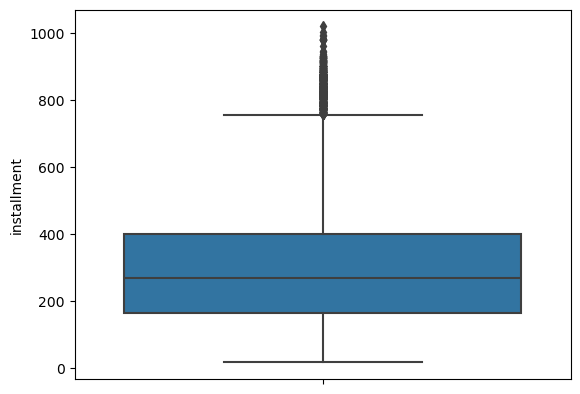

In [39]:
ax = sns.boxplot(y='installment', data=df)
ax.plot()

lower_wisk,upper_wisk = calc_wiskers('installment',df)
print(lower_wisk,upper_wisk)
print(len(df[df.installment>upper_wisk]))
print(len(df[df.installment<lower_wisk]))

### getting rid of outliers

In [40]:
df = df[df.installment<=upper_wisk]
df = df[df.installment>=lower_wisk]
df.shape

(34118, 23)

[]

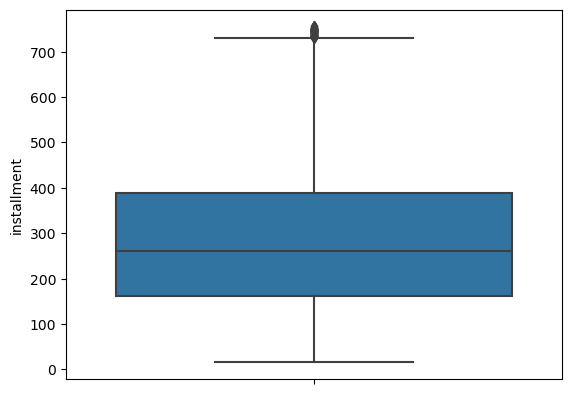

In [41]:
ax = sns.boxplot(y='installment', data=df)
ax.plot()

### 2.1.7 dti

[]

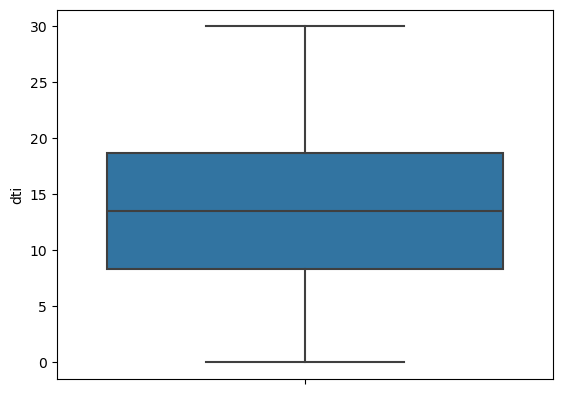

In [42]:
ax = sns.boxplot(y='dti', data=df)
ax.plot()


### removing outlies in temp dataframe just to see if this var has any effect on outcome, otherwise no point in removing data unnessarily

# 3. Segmented Univariate Analysis

### 3.1 grade

<Axes: xlabel='grade', ylabel='count'>

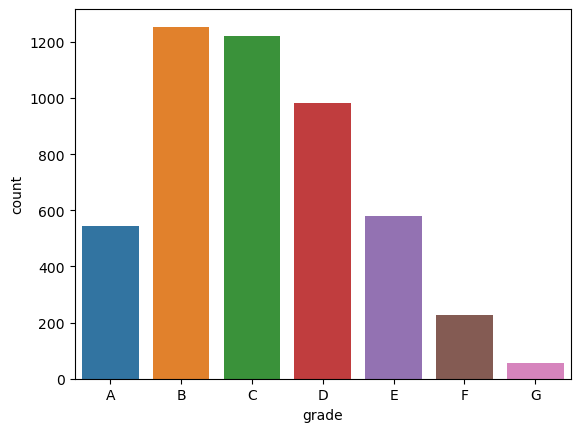

In [43]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

### Observation -  Numberwise in grade B and C there are lot of defaults

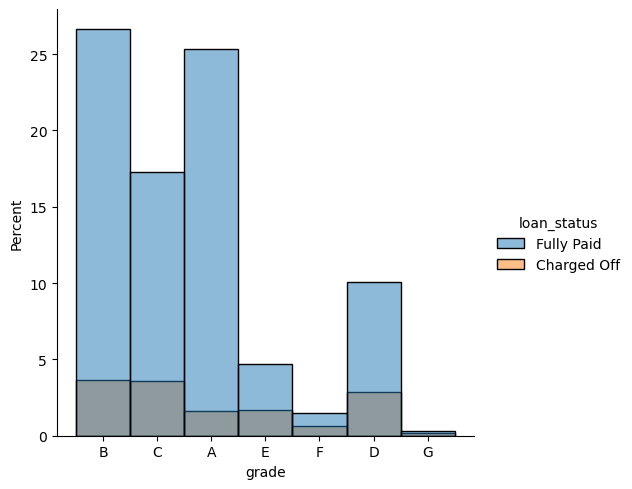

In [44]:
p = sns.displot(data=df, x='grade', stat='percent',hue='loan_status')
plt.show()

In [45]:
df_temp = df.groupby(['grade','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('grade')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])



   grade  loan_status  count  total_count  percentage
0      A  Charged Off    544         9194        5.92
1      A   Fully Paid   8650         9194       94.08
2      B  Charged Off   1254        10335       12.13
3      B   Fully Paid   9081        10335       87.87
4      C  Charged Off   1220         7106       17.17
5      C   Fully Paid   5886         7106       82.83
6      D  Charged Off    984         4412       22.30
7      D   Fully Paid   3428         4412       77.70
8      E  Charged Off    580         2177       26.64
9      E   Fully Paid   1597         2177       73.36
10     F  Charged Off    228          729       31.28
11     F   Fully Paid    501          729       68.72
12     G  Charged Off     56          165       33.94
13     G   Fully Paid    109          165       66.06
   grade  loan_status  count  total_count  percentage
0      A  Charged Off    544         9194        5.92
2      B  Charged Off   1254        10335       12.13
4      C  Charged Off   1220

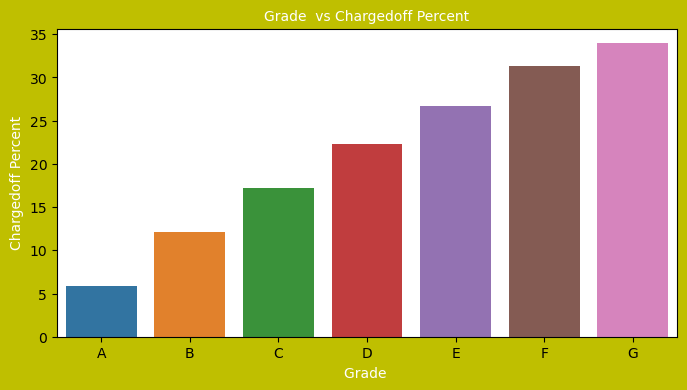

In [46]:
# graph
loanData = df
applicantgrade_loandefault_relation = loanData.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
applicantgrade_loandefault_relation['Total'] = applicantgrade_loandefault_relation['Charged Off']+ applicantgrade_loandefault_relation['Fully Paid']
applicantgrade_loandefault_relation['Chargedoff_Percent'] = (applicantgrade_loandefault_relation['Charged Off'] / applicantgrade_loandefault_relation['Total'])*100
applicantgrade_loandefault_relation.sort_values('Chargedoff_Percent', ascending=False)

fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('Grade  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Percent', data=applicantgrade_loandefault_relation)
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()

### Observation: Of the all persons who have taken loan from category C and onwards more than 12% have defaulted, so categories C,D,E,F,G have very high rate of defaults

In [47]:
df.term.value_counts()

term
 36 months    25948
 60 months     8170
Name: count, dtype: int64

### 2.2 sub_grade

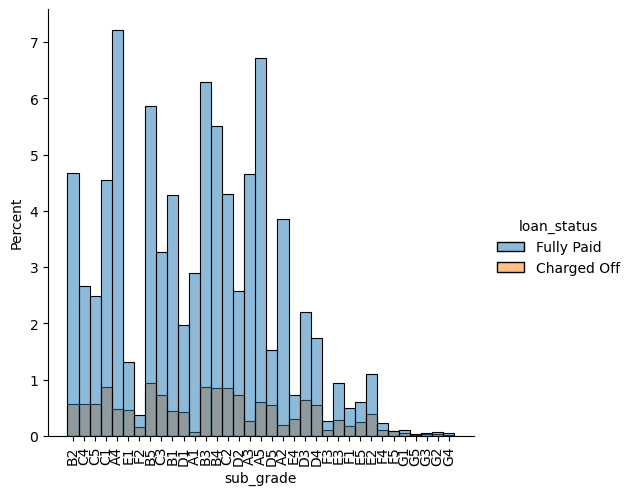

In [48]:
p = sns.displot(data=df, x='sub_grade', stat='percent',hue='loan_status')
plt.xticks(rotation=90)
plt.show()

In [49]:
df_temp = df.groupby(['sub_grade','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('sub_grade')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])

   sub_grade  loan_status  count  total_count  percentage
0         A1  Charged Off     24         1014        2.37
1         A1   Fully Paid    990         1014       97.63
2         A2  Charged Off     67         1381        4.85
3         A2   Fully Paid   1314         1381       95.15
4         A3  Charged Off     88         1675        5.25
..       ...          ...    ...          ...         ...
65        G3   Fully Paid     16           25       64.00
66        G4  Charged Off      7           25       28.00
67        G4   Fully Paid     18           25       72.00
68        G5  Charged Off      7           16       43.75
69        G5   Fully Paid      9           16       56.25

[70 rows x 5 columns]
   sub_grade  loan_status  count  total_count  percentage
0         A1  Charged Off     24         1014        2.37
2         A2  Charged Off     67         1381        4.85
4         A3  Charged Off     88         1675        5.25
6         A4  Charged Off    161         2625    

### Observation: Of the all persons who have taken loan from category B3 and onwards more than 12% have defaulted, so in our earlier observation we had suggested catogory C and onwards as probable defaulters, but as per above analysis subcategories of B ie B3 and onwards are also probable defaulters

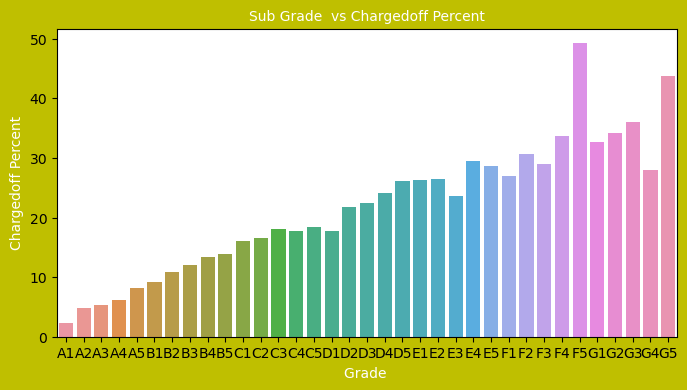

In [50]:
fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('Sub Grade  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='sub_grade', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()


### 2.3 term

<Axes: xlabel='count', ylabel='term'>

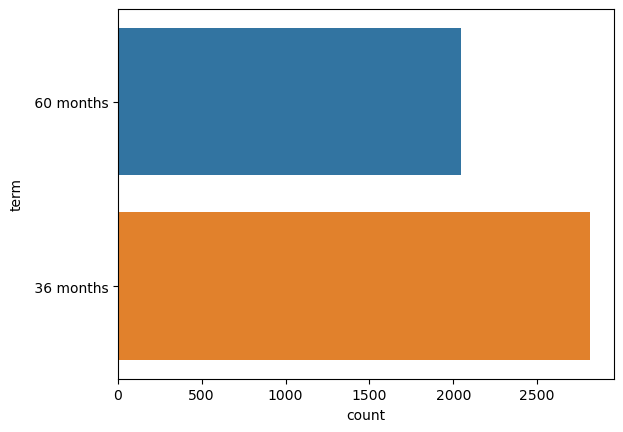

In [51]:
sns.countplot(y = 'term', data = df[df.loan_status == 'Charged Off'])

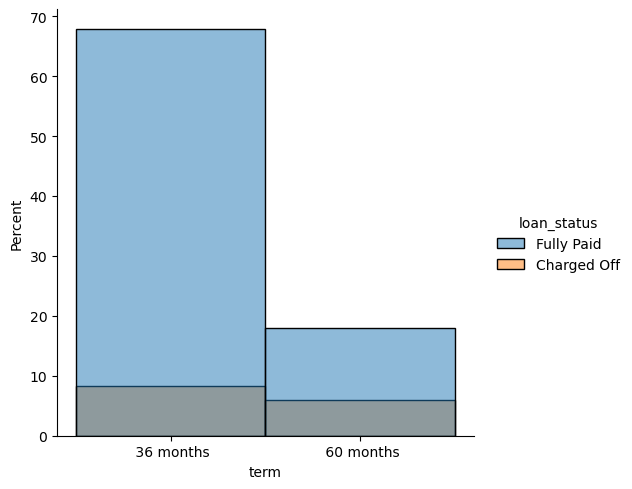

In [52]:
p = sns.displot(data=df, x='term', stat='percent',hue='loan_status')
plt.show()

In [53]:
df_temp = df.groupby(['term','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('term')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])

         term  loan_status  count  total_count  percentage
0   36 months  Charged Off   2817        25948       10.86
1   36 months   Fully Paid  23131        25948       89.14
2   60 months  Charged Off   2049         8170       25.08
3   60 months   Fully Paid   6121         8170       74.92
         term  loan_status  count  total_count  percentage
0   36 months  Charged Off   2817        25948       10.86
2   60 months  Charged Off   2049         8170       25.08


### Observation: Of the all persons who have taken loan for term of '60 months' more than 25% have defaulted, so categories term of 60 months have very high rate of defaults

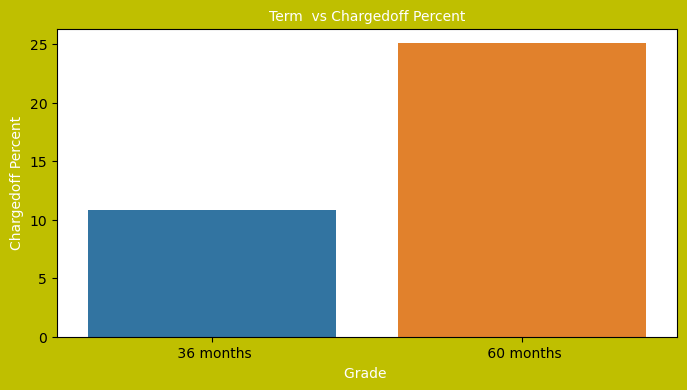

In [54]:
fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('Term  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='term', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()


### 2.4 interest rate

<Axes: xlabel='int_rate_bracket', ylabel='count'>

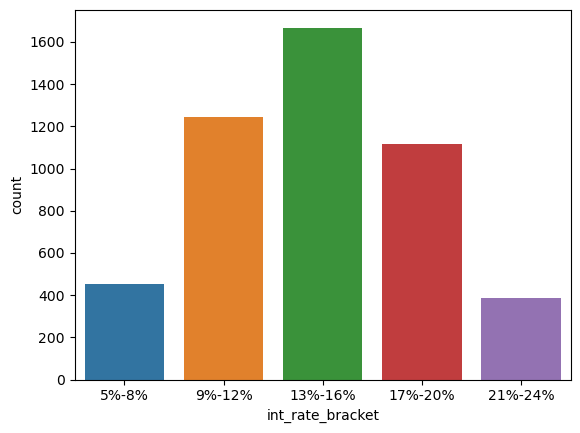

In [55]:
df['int_rate_bracket'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-8%','9%-12%','13%-16%','17%-20%','21%-24%'])
sns.countplot(x = 'int_rate_bracket', data = df[df.loan_status == 'Charged Off'])

### Observation: numberwise more charged off when int rate is 9% to 16%

In [56]:
df.int_rate.min()

5.42

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


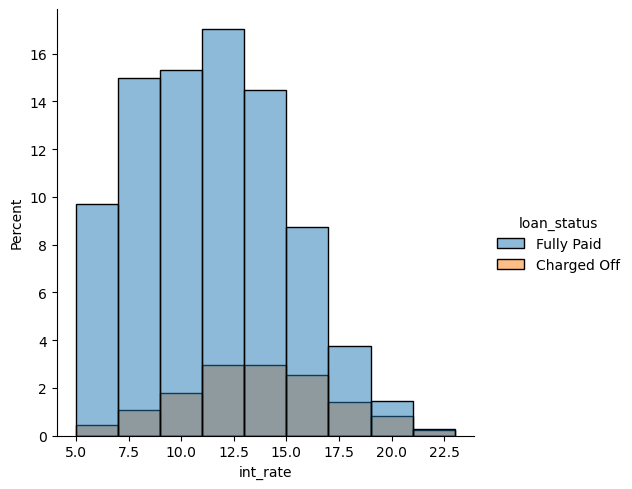

In [57]:
custom_bins = list(range(5,25,2))
print(custom_bins)

p = sns.displot(data=df, x='int_rate', stat='percent',hue='loan_status',bins=custom_bins)
plt.show()

In [58]:
def get_intrate_category(x):
    if x>=5 and x<=7.5:
        return '5-7.5'
    elif x>7.5 and x<=10:
        return '7.5-10'
    elif x>10 and x<=12.5:
        return '10-12.5'
    elif x>12.5 and x<=15:
        return '12.5-15'
    elif x>15 and x<=17.5:
        return '15-17.5'
    elif x>17.5 and x<=20:
        return '17.5-20'
    elif x>20 and x<=22.5:
        return '20-22.5'

df['int rate category'] = df['int_rate'].apply(get_intrate_category)
df['int rate category']

df_temp = df.groupby(['int rate category','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('int rate category')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])

   int rate category  loan_status  count  total_count  percentage
0            10-12.5  Charged Off   1099         8326       13.20
1            10-12.5   Fully Paid   7227         8326       86.80
2            12.5-15  Charged Off   1318         8000       16.48
3            12.5-15   Fully Paid   6682         8000       83.52
4            15-17.5  Charged Off   1026         4426       23.18
5            15-17.5   Fully Paid   3400         4426       76.82
6            17.5-20  Charged Off    499         1668       29.92
7            17.5-20   Fully Paid   1169         1668       70.08
8            20-22.5  Charged Off    186          478       38.91
9            20-22.5   Fully Paid    292          478       61.09
10             5-7.5  Charged Off    227         4897        4.64
11             5-7.5   Fully Paid   4670         4897       95.36
12            7.5-10  Charged Off    511         6323        8.08
13            7.5-10   Fully Paid   5812         6323       91.92
   int rat

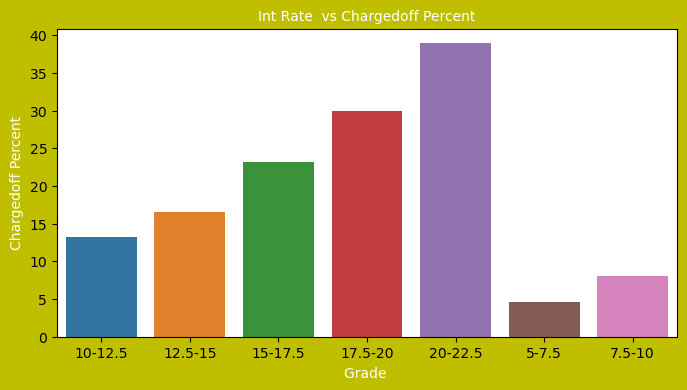

In [59]:
fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('Int Rate  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='int rate category', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()


### Observation: Of the all persons who have taken loan from rate of 10% and onwards onwards more than 13% have defaulted, so rate of interest of 10% and higher have very high rate of defaults

In [60]:
df.emp_length.value_counts()

emp_length
10+ years    7368
< 1 year     4221
2 years      3978
3 years      3696
4 years      3072
1 year       2945
5 years      2915
6 years      1985
7 years      1563
8 years      1271
9 years      1104
Name: count, dtype: int64

### 2.5 emp_length

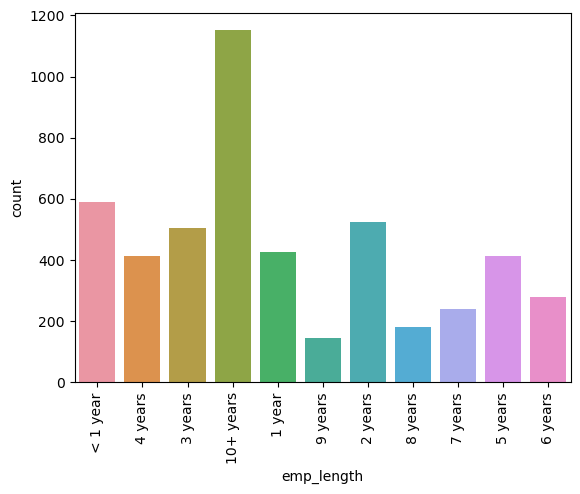

In [61]:
sns.countplot(x = 'emp_length', data = df[df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

### observation: numberwise when emp length is 10 year more defaults happens

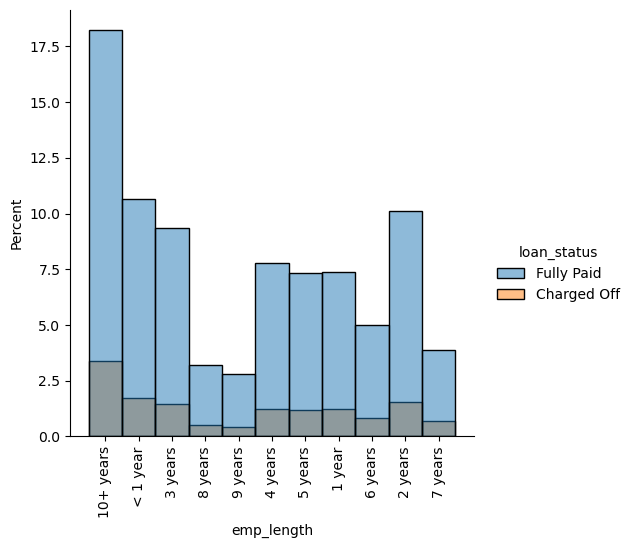

In [62]:
p = sns.displot(data=df,x='emp_length',hue='loan_status',stat='percent')
plt.xticks(rotation=90)
plt.show()

In [63]:
df_temp = df.groupby(['emp_length','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('emp_length')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])

   emp_length  loan_status  count  total_count  percentage
0      1 year  Charged Off    426         2945       14.47
1      1 year   Fully Paid   2519         2945       85.53
2   10+ years  Charged Off   1151         7368       15.62
3   10+ years   Fully Paid   6217         7368       84.38
4     2 years  Charged Off    524         3978       13.17
5     2 years   Fully Paid   3454         3978       86.83
6     3 years  Charged Off    504         3696       13.64
7     3 years   Fully Paid   3192         3696       86.36
8     4 years  Charged Off    415         3072       13.51
9     4 years   Fully Paid   2657         3072       86.49
10    5 years  Charged Off    412         2915       14.13
11    5 years   Fully Paid   2503         2915       85.87
12    6 years  Charged Off    279         1985       14.06
13    6 years   Fully Paid   1706         1985       85.94
14    7 years  Charged Off    239         1563       15.29
15    7 years   Fully Paid   1324         1563       84.

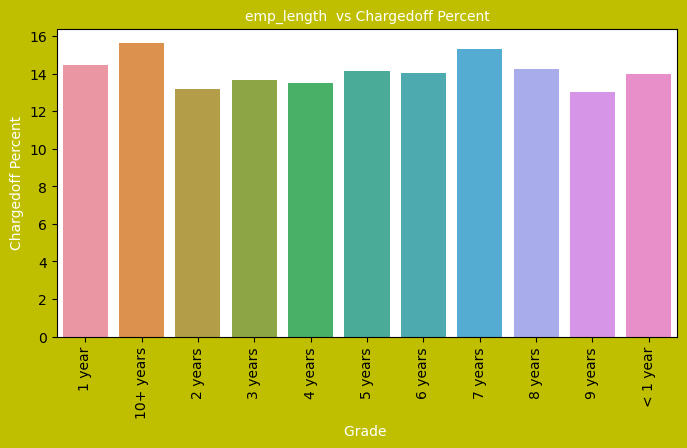

In [65]:
fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('emp_length  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='emp_length', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.xticks(rotation=90)
plt.show()


### Observation: no significant difference in percentages of defaulted/paid loans as per emp_length

### 2.6 home ownership

<Axes: xlabel='home_ownership'>

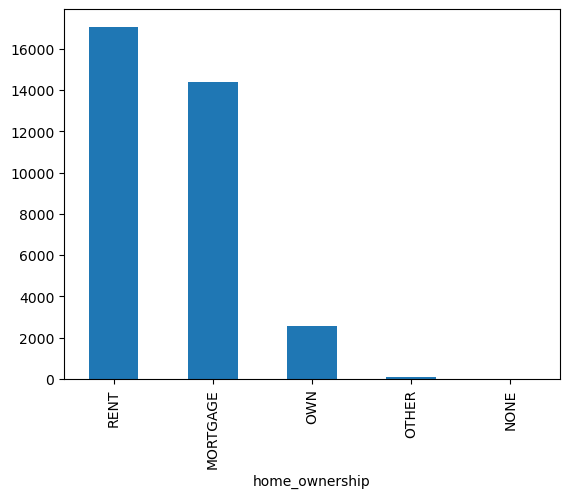

In [61]:
loanData['home_ownership'].value_counts().plot.bar()

### observation: numberwise cutomers who own home have lesser defaults on loan

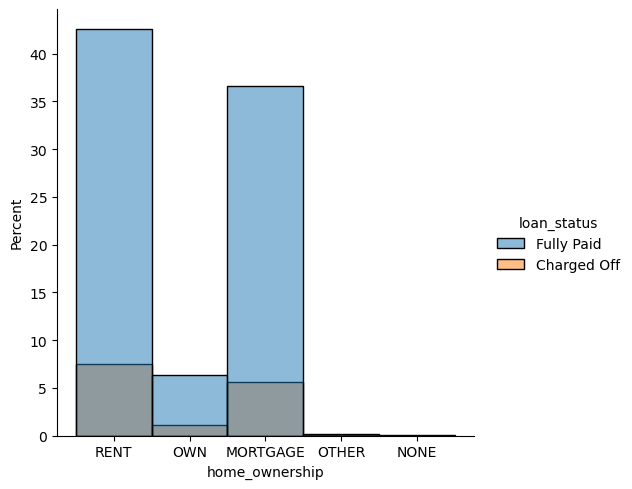

In [62]:
p = sns.displot(data=df,x='home_ownership',hue='loan_status',stat='percent')

In [116]:
df_temp = df.groupby(['home_ownership','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('home_ownership')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])

  home_ownership  loan_status  count  total_count  percentage
0       MORTGAGE  Charged Off   1928        14407       13.38
1       MORTGAGE   Fully Paid  12479        14407       86.62
2           NONE   Fully Paid      3            3      100.00
3          OTHER  Charged Off     16           90       17.78
4          OTHER   Fully Paid     74           90       82.22
5            OWN  Charged Off    369         2548       14.48
6            OWN   Fully Paid   2179         2548       85.52
7           RENT  Charged Off   2553        17070       14.96
8           RENT   Fully Paid  14517        17070       85.04
  home_ownership  loan_status  count  total_count  percentage
0       MORTGAGE  Charged Off   1928        14407       13.38
3          OTHER  Charged Off     16           90       17.78
5            OWN  Charged Off    369         2548       14.48
7           RENT  Charged Off   2553        17070       14.96


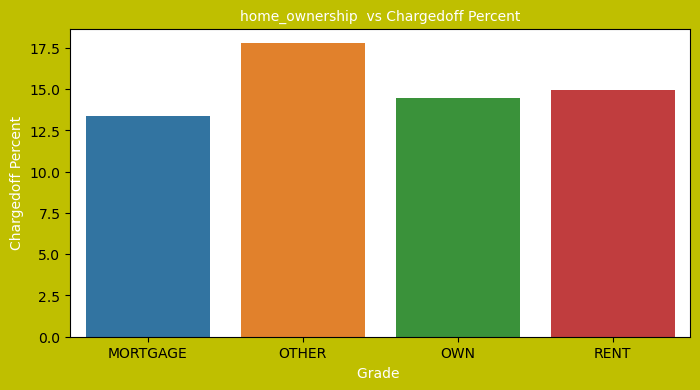

In [117]:
fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('home_ownership  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='home_ownership', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()


### observation: no significant difference in percentages of defaulted/paid loans as per home_ownership

### 2.6 verification_status

<Axes: xlabel='verification_status', ylabel='count'>

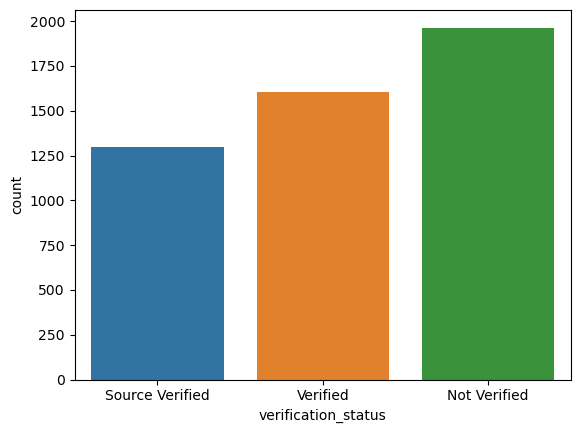

In [64]:
sns.countplot(x = 'verification_status', data = df[df.loan_status == 'Charged Off'])

### numberwise when source is verified then charged off is less

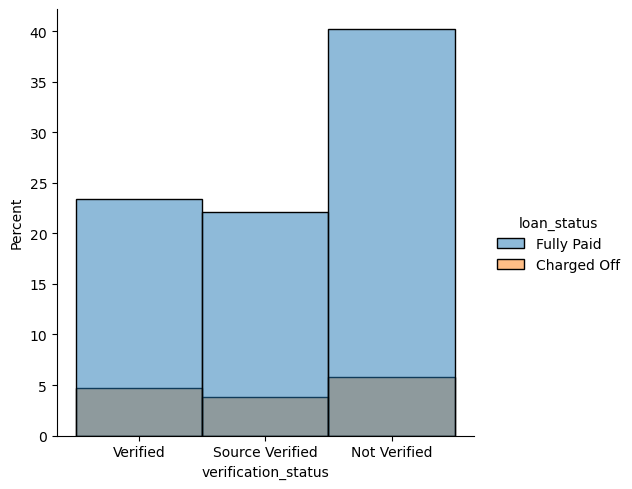

In [65]:
p = sns.displot(data=df,x='verification_status',hue='loan_status',stat='percent')

  verification_status  loan_status  count  total_count  percentage
0        Not Verified  Charged Off   1964        15670       12.53
1        Not Verified   Fully Paid  13706        15670       87.47
2     Source Verified  Charged Off   1297         8845       14.66
3     Source Verified   Fully Paid   7548         8845       85.34
4            Verified  Charged Off   1605         9603       16.71
5            Verified   Fully Paid   7998         9603       83.29
  verification_status  loan_status  count  total_count  percentage
0        Not Verified  Charged Off   1964        15670       12.53
2     Source Verified  Charged Off   1297         8845       14.66
4            Verified  Charged Off   1605         9603       16.71


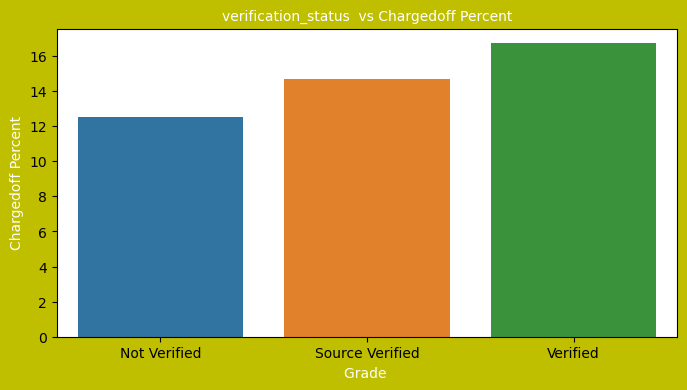

In [118]:
df_temp = df.groupby(['verification_status','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('verification_status')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'])


fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('verification_status  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='verification_status', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.show()

### observation: no significant difference in percentages of defaulted/paid loans as per verification_status

### 2.7 purpose

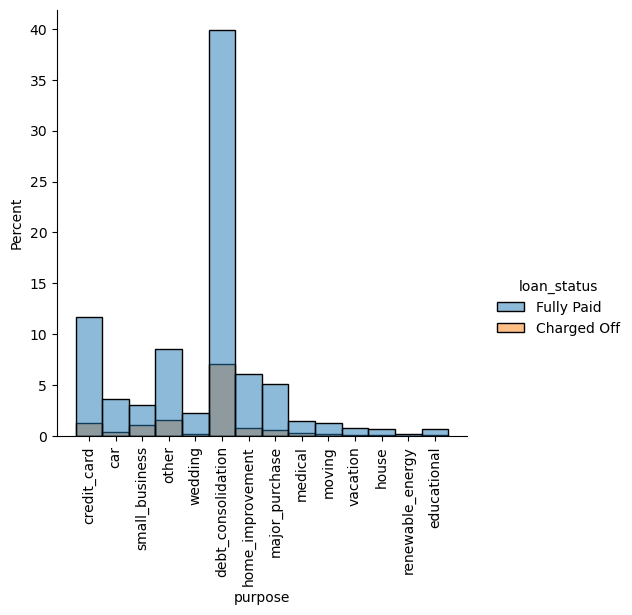

In [67]:
p = sns.displot(data=df,x='purpose',hue='loan_status',stat='percent')
plt.xticks(rotation=90)
plt.show()

               purpose  loan_status  count  total_count  percentage
26             wedding  Charged Off     85          862        9.86
12      major_purchase  Charged Off    199         1943       10.24
2          credit_card  Charged Off    459         4466       10.28
0                  car  Charged Off    152         1397       10.88
8     home_improvement  Charged Off    284         2367       12.00
24            vacation  Charged Off     49          337       14.54
4   debt_consolidation  Charged Off   2410        16017       15.05
16              moving  Charged Off     82          522       15.71
14             medical  Charged Off     97          617       15.72
18               other  Charged Off    547         3473       15.75
6          educational  Charged Off     49          300       16.33
10               house  Charged Off     50          303       16.50
20    renewable_energy  Charged Off     16           83       19.28
22      small_business  Charged Off    387      

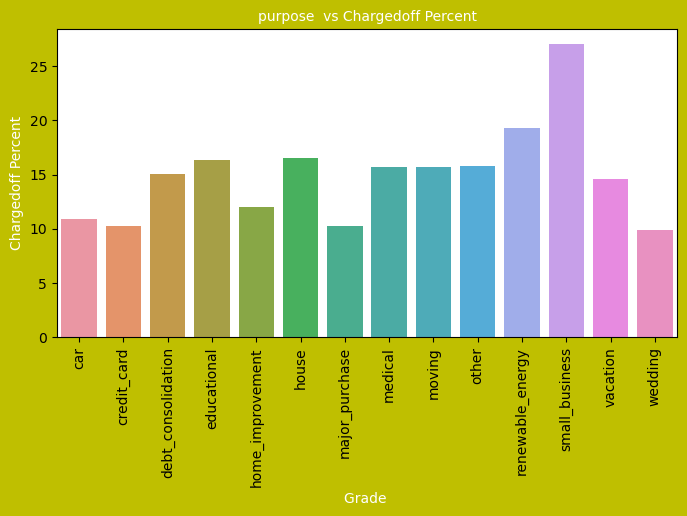

In [121]:
df_temp = df.groupby(['purpose','loan_status']).size()
df_temp = df_temp.reset_index(name='count')
df_temp['total_count'] = df_temp.groupby('purpose')['count'].transform('sum')
# df_temp['total_count']

df_temp['percentage'] = round(df_temp['count']/df_temp['total_count']*100,2)

# print(df_temp)

print(df_temp[df_temp['loan_status']=='Charged Off'].sort_values(['percentage']))

fig, ax1 = plt.subplots(figsize=(8, 4),facecolor='y')
ax1.set_title('purpose  vs Chargedoff Percent',fontsize=10,color='w')
ax1=sns.barplot(x='purpose', y='percentage', data=df_temp[df_temp['loan_status']=='Charged Off'])
ax1.set_xlabel('Grade ',fontsize=10,color='w')
ax1.set_ylabel('Chargedoff Percent',fontsize=10,color = 'w')
plt.xticks(rotation=90)
plt.show()

### Observation:
### purpose 'wedding,major_purchase,credit_card,car,home_improvement' have lower rates of defaulting
### purpose 'vacation,debt_consolidation,moving,other,educational,house' have medium rates of default
### purpose 'renewable_energy,small_business' have very higher ratest of default

# 2.8 dti

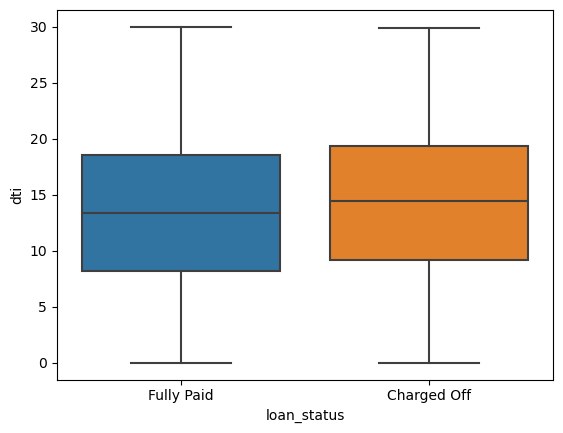

In [69]:
p = sns.boxplot(data=df,x='loan_status',y='dti')

### observation: no significant difference of spread of defaulted/paid loans wrt dti

### 2.9 annual_inc

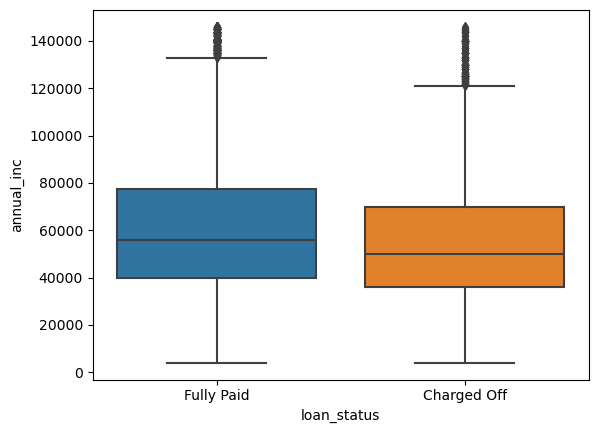

In [70]:
p = sns.boxplot(data=df,x='loan_status',y='annual_inc')

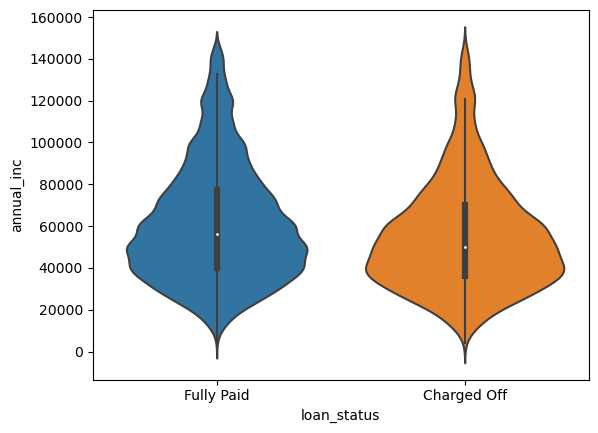

In [71]:
p = sns.violinplot(data=df,x='loan_status',y='annual_inc')

In [72]:
df[df.loan_status=='Fully Paid'].annual_inc.quantile([0.25])

0.25    40000.0
Name: annual_inc, dtype: float64

### observation: no significant difference of spread of defaulted/paid loans wrt annual_income

### 2.10 funded_amnt

<Axes: xlabel='funded_amnt_range', ylabel='count'>

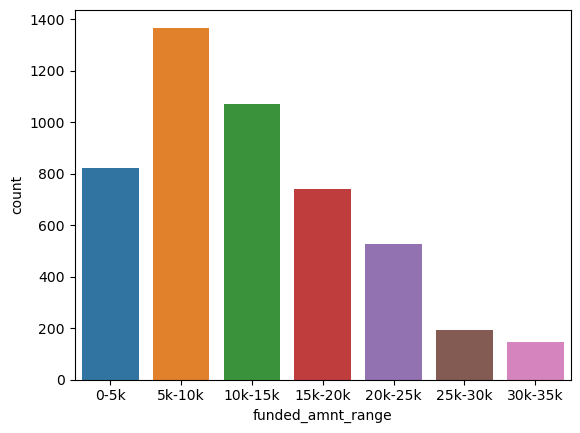

In [73]:
loanData = df
loanData['funded_amnt_range'] = pd.cut(loanData['funded_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sns.countplot(x = 'funded_amnt_range', data = loanData[loanData.loan_status == 'Charged Off'])

### numberwise applicants funded smaller loan amount defaulted more

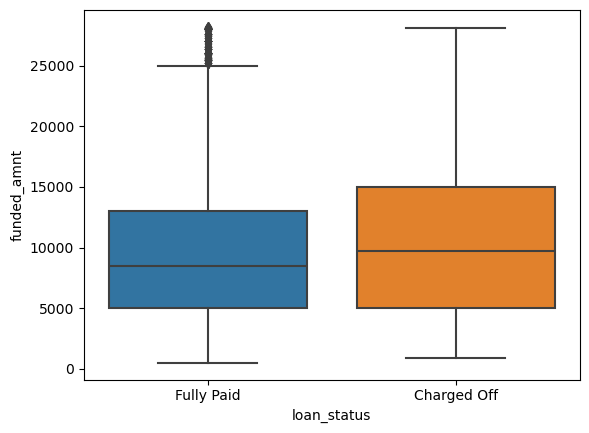

In [74]:
p = sns.boxplot(data=df,x='loan_status',y='funded_amnt')

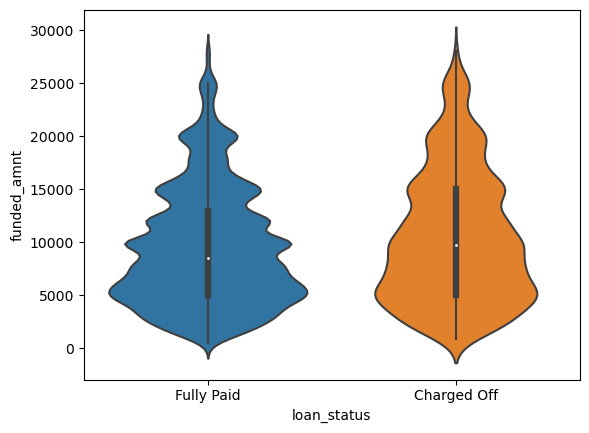

In [75]:
p = sns.violinplot(data=df,x='loan_status',y='funded_amnt')

In [76]:
df[df.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13000.0
0.900    18000.0
0.950    20000.0
0.970    21250.0
0.975    22000.0
0.980    23449.5
0.990    25000.0
1.000    28200.0
Name: funded_amnt, dtype: float64

### observation: slightly more chances of default if the funded amount is greater than 13000

### 2.11 int_rate

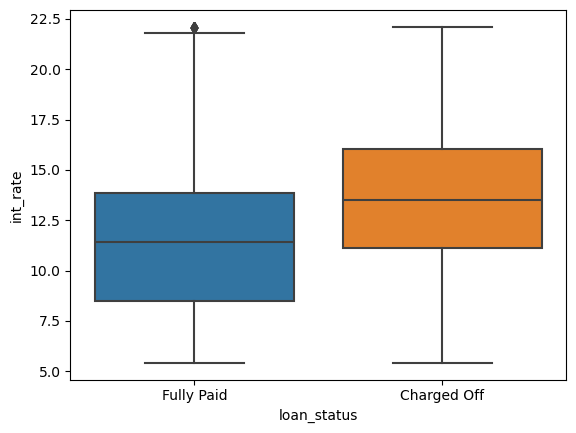

In [77]:
p = sns.boxplot(data=df,x='loan_status',y='int_rate')

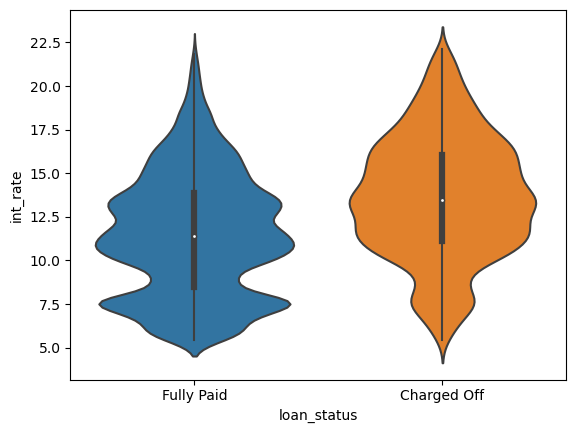

In [78]:
p = sns.violinplot(data=df,x='loan_status',y='int_rate')

In [79]:
df[df.loan_status=='Fully Paid'].int_rate.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13.85
0.900    16.29
0.950    17.49
0.970    18.39
0.975    18.64
0.980    19.03
0.990    19.91
1.000    22.11
Name: int_rate, dtype: float64

### observation: more chances of default if the int_rate is greater than 13.85

### 2.12 installment

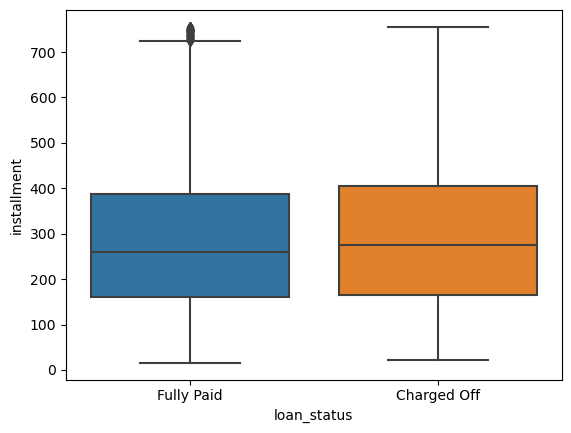

In [80]:
p=sns.boxplot(data=df,x='loan_status',y='installment')

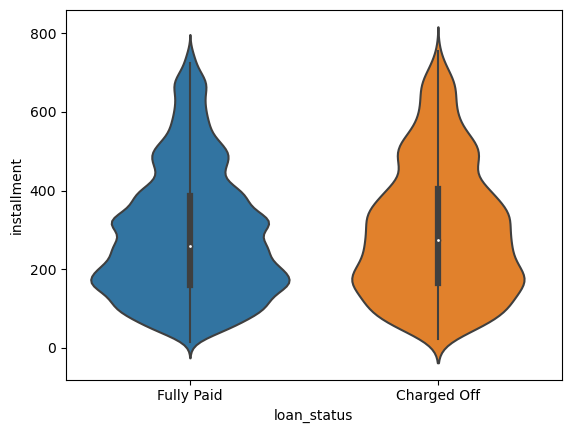

In [81]:
p=sns.violinplot(data=df,x='loan_status',y='installment')

### observation: no significant difference of spread of defaulted/paid loans wrt installment

# 3. Bivariate Analysis

In [82]:
df['installment_groups'] = pd.cut(df['installment'], bins=[0,100,200,300,400,500,600,700,800],precision =0)
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=[0,20000,40000,60000,80000,100000,120000,140000,160000],precision =0)
df['funded_amnt_groups'] = pd.cut(df['funded_amnt'], bins=[0,5000,10000,15000,20000,25000,30000],precision =0)

## interest vs annual_inc

<Axes: xlabel='int rate category', ylabel='annual_inc'>

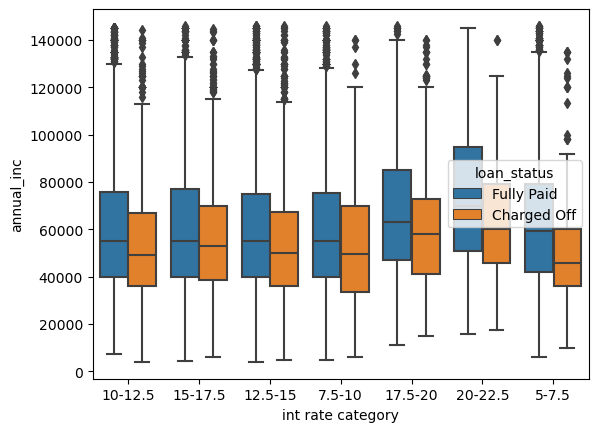

In [83]:
sns.boxplot(data=df,y='annual_inc',x='int rate category',hue='loan_status')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0, 20000]'),
  Text(1, 0, '(20000, 40000]'),
  Text(2, 0, '(40000, 60000]'),
  Text(3, 0, '(60000, 80000]'),
  Text(4, 0, '(80000, 100000]'),
  Text(5, 0, '(100000, 120000]'),
  Text(6, 0, '(120000, 140000]'),
  Text(7, 0, '(140000, 160000]')])

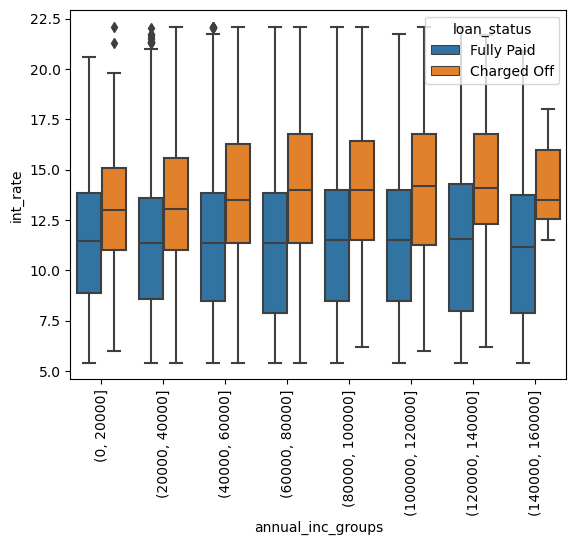

In [84]:
sns.boxplot(data=df,y='int_rate',x='annual_inc_groups',hue='loan_status')
plt.xticks(rotation=90)

In [85]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('60000, 80000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].int_rate.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))

0.750    13.85
0.900    16.40
0.950    17.74
0.970    18.64
0.975    18.99
0.980    19.29
0.990    20.30
1.000    22.11
Name: int_rate, dtype: float64


### Observation: apparantly more chances of defaults accross all salary groups if rate of interst is greater than 13.85

## installment vs annual_inc

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0, 100]'),
  Text(1, 0, '(100, 200]'),
  Text(2, 0, '(200, 300]'),
  Text(3, 0, '(300, 400]'),
  Text(4, 0, '(400, 500]'),
  Text(5, 0, '(500, 600]'),
  Text(6, 0, '(600, 700]'),
  Text(7, 0, '(700, 800]')])

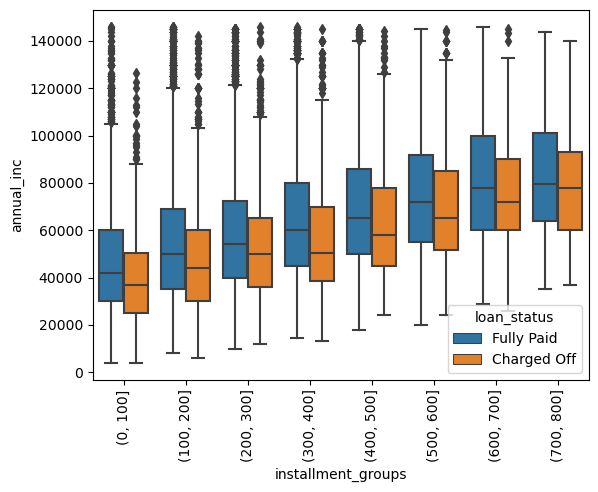

In [86]:
sns.boxplot(data=df,y='annual_inc',x='installment_groups',hue='loan_status')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0, 20000]'),
  Text(1, 0, '(20000, 40000]'),
  Text(2, 0, '(40000, 60000]'),
  Text(3, 0, '(60000, 80000]'),
  Text(4, 0, '(80000, 100000]'),
  Text(5, 0, '(100000, 120000]'),
  Text(6, 0, '(120000, 140000]'),
  Text(7, 0, '(140000, 160000]')])

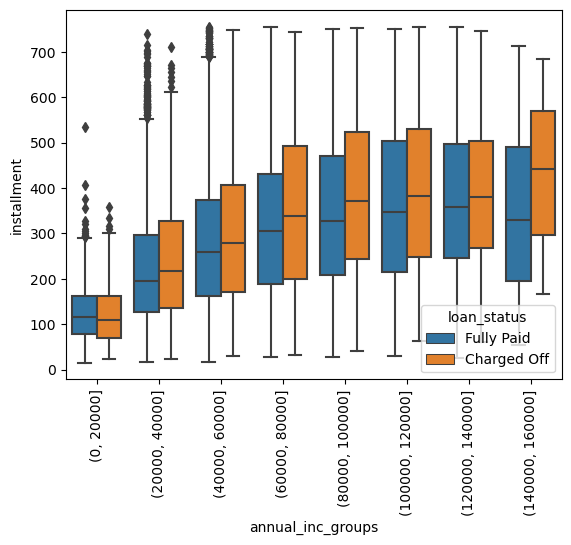

In [87]:
sns.boxplot(data=df,y='installment',x='annual_inc_groups',hue='loan_status')
plt.xticks(rotation=90)

0.750    489.73500
0.900    627.30500
0.950    658.53000
0.970    674.34750
0.975    680.96125
0.980    685.96300
0.990    694.53300
1.000    713.34000
Name: installment, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for annual_inc group 140k-160k')

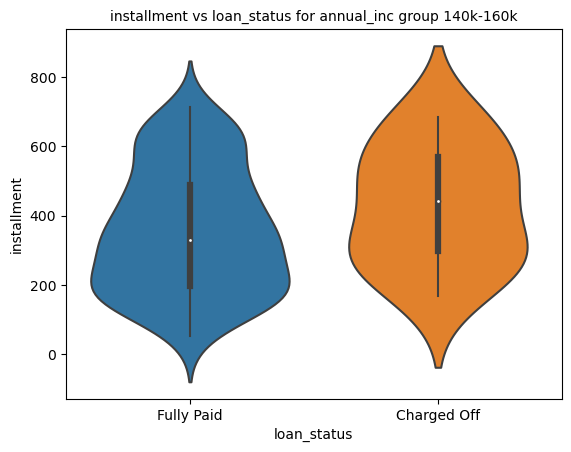

In [122]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('140000, 160000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].installment.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='installment')
p.set_title('installment vs loan_status for annual_inc group 140k-160k',fontsize=10)

### Observation: if the salary range is 140k-160k , and installment is more than 490 then there are more chances of defaulting

0.750    469.9300
0.900    596.7920
0.950    662.4460
0.970    683.2156
0.975    688.9080
0.980    692.9300
0.990    720.1800
1.000    750.9700
Name: installment, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for annual_inc group 80k-100k')

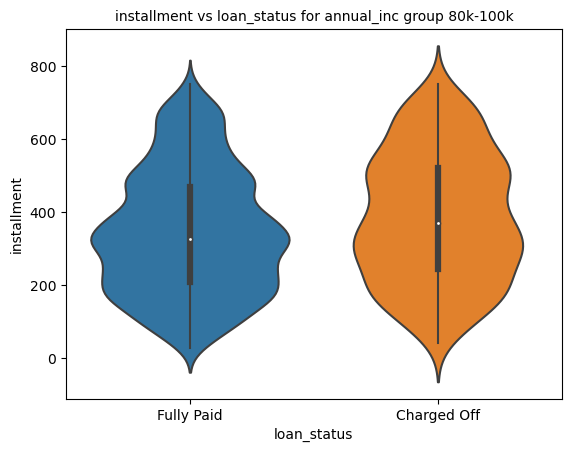

In [124]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('80000, 100000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].installment.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='installment',order=['Fully Paid', 'Charged Off'])
p.set_title('installment vs loan_status for annual_inc group 80k-100k',fontsize=10)

### Observation: if the salary range is 80k-100k , and installment is more than 470 then there are apparently more chances of defaulting

 ### <span style="color:red">Note: Charged Off is dipicted in blue in above violin chart </span>

0.750    430.25250
0.900    560.12500
0.950    638.53250
0.970    670.90000
0.975    678.97875
0.980    686.55800
0.990    711.71450
1.000    755.69000
Name: installment, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for annual_inc group 60k-80k')

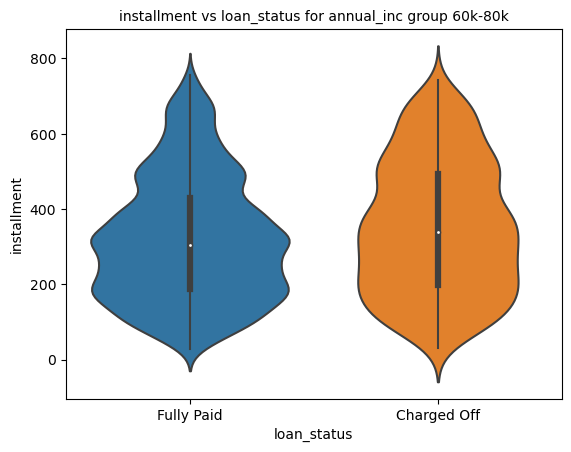

In [125]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('60000, 80000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].installment.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='installment')
p.set_title('installment vs loan_status for annual_inc group 60k-80k',fontsize=10)

### Observation: if the salary range is 60k-80k , and installment is more than 430 then there are apparently more chances of defaulting

## funded_amnt vs annual_inc

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(0, 5000]'),
  Text(1, 0, '(5000, 10000]'),
  Text(2, 0, '(10000, 15000]'),
  Text(3, 0, '(15000, 20000]'),
  Text(4, 0, '(20000, 25000]'),
  Text(5, 0, '(25000, 30000]')])

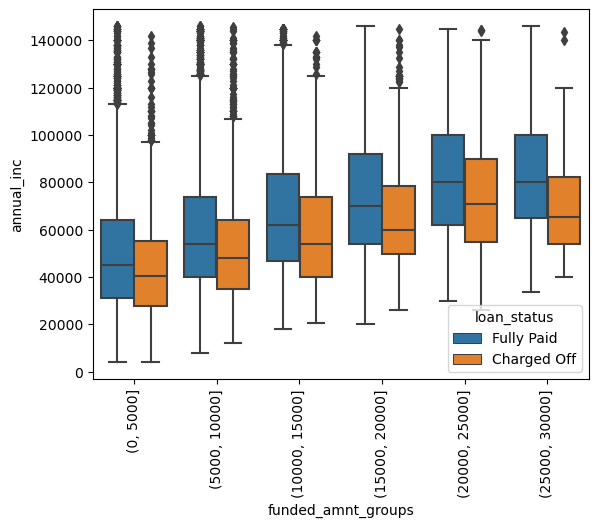

In [134]:
sns.boxplot(data=df,y='annual_inc',x='funded_amnt_groups',hue='loan_status')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0, 20000]'),
  Text(1, 0, '(20000, 40000]'),
  Text(2, 0, '(40000, 60000]'),
  Text(3, 0, '(60000, 80000]'),
  Text(4, 0, '(80000, 100000]'),
  Text(5, 0, '(100000, 120000]'),
  Text(6, 0, '(120000, 140000]'),
  Text(7, 0, '(140000, 160000]')])

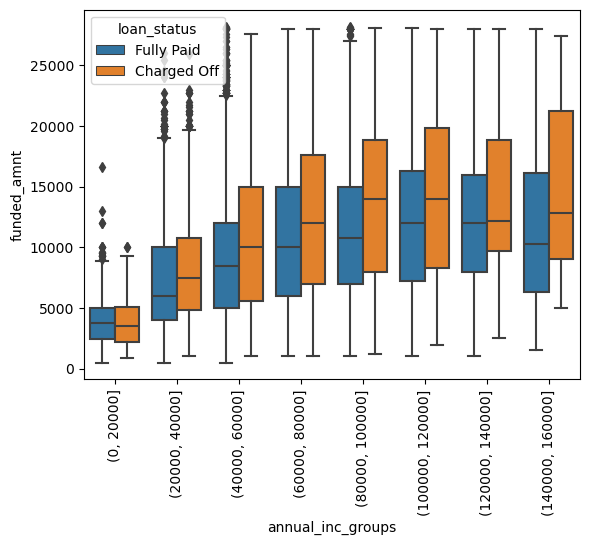

In [92]:
sns.boxplot(data=df,y='funded_amnt',x='annual_inc_groups',hue='loan_status')
plt.xticks(rotation=90)

0.750    16275.0
0.900    20000.0
0.950    24000.0
0.970    25000.0
0.975    25000.0
0.980    25000.0
0.990    25576.0
1.000    28075.0
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 100k-120k')

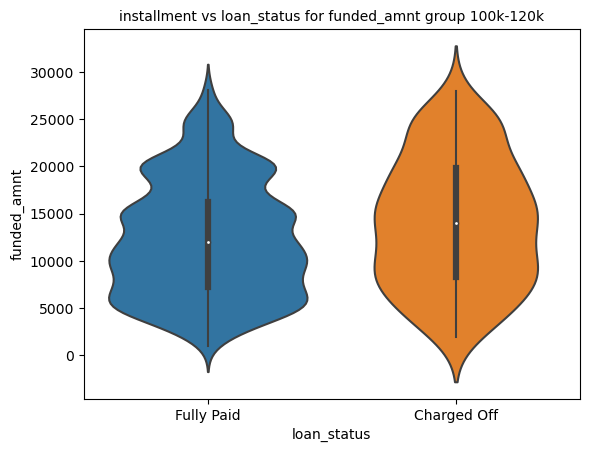

In [126]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('100000, 120000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt')
p.set_title('installment vs loan_status for funded_amnt group 100k-120k',fontsize=10)

0.750    16000.00
0.900    20157.50
0.950    24000.00
0.970    25000.00
0.975    25000.00
0.980    25000.00
0.990    25114.75
1.000    28000.00
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 120k-140k')

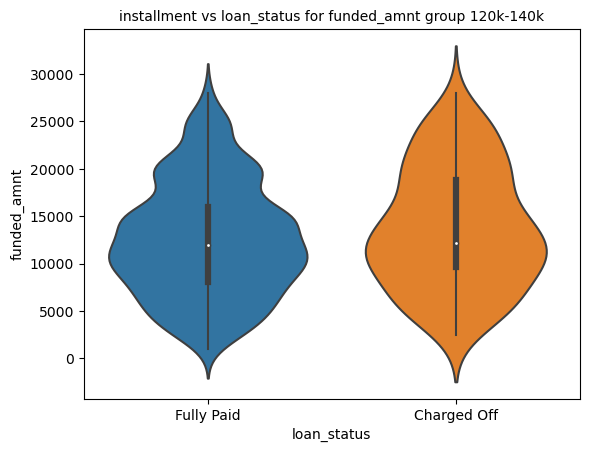

In [129]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('120000, 140000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt')
p.set_title('installment vs loan_status for funded_amnt group 120k-140k',fontsize=10)

0.750    16162.50
0.900    20900.00
0.950    24718.75
0.970    25000.00
0.975    25000.00
0.980    25000.00
0.990    25162.50
1.000    28000.00
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 140k-160k')

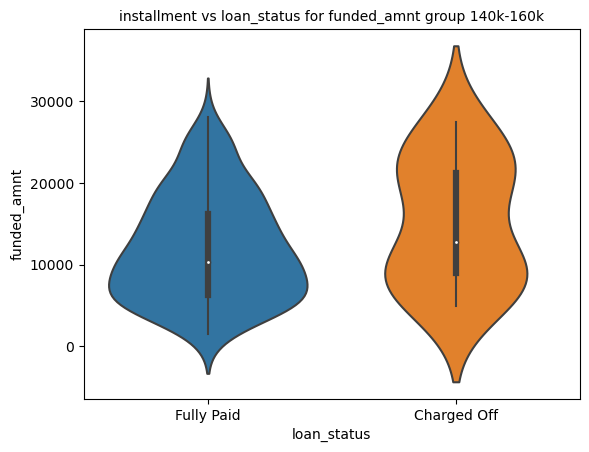

In [128]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('140000, 160000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt')
p.set_title('installment vs loan_status for funded_amnt group 140k-160k',fontsize=10)

### Observations: 
### for salary group of 140k-160k apparently more chances of failure if funded_amnt is greater than 16500
### for salagy group of 120k-140k apparently more chances of failure if funded_amnt is greater than 16275

0.750    15000.0
0.900    20000.0
0.950    20800.0
0.970    23000.0
0.975    24000.0
0.980    24250.0
0.990    25000.0
1.000    28000.0
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 60k-80k')

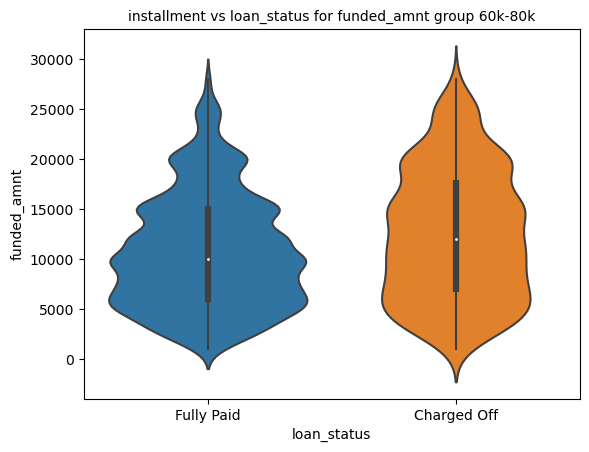

In [130]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('60000, 80000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt')
p.set_title('installment vs loan_status for funded_amnt group 60k-80k',fontsize=10)

0.750    15000.0
0.900    20000.0
0.950    22000.0
0.970    24000.0
0.975    25000.0
0.980    25000.0
0.990    25000.0
1.000    28200.0
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 80k-100k')

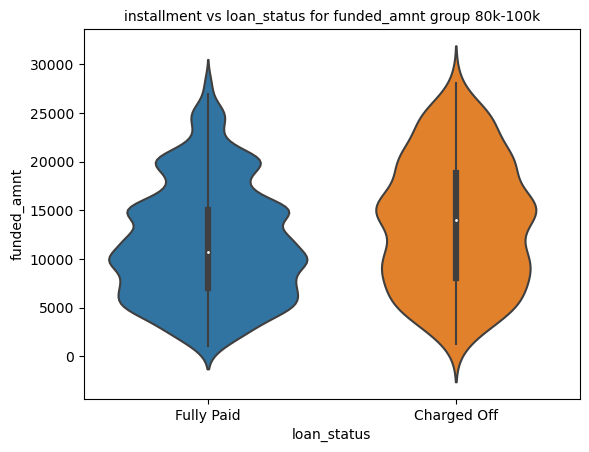

In [133]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('80000, 100000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt',order=['Fully Paid', 'Charged Off'])
p.set_title('installment vs loan_status for funded_amnt group 80k-100k',fontsize=10)

### Observations: 
### for salary groups of 60k-80k,80k-100k apparently more chances of failure if funded_amnt is greater than 15000
 ### <span style="color:red">Note: Charged Off is dipicted in blue in above violin chart </span>

0.750    12000.0
0.900    16200.0
0.950    20000.0
0.970    20000.0
0.975    20500.0
0.980    21600.0
0.990    24000.0
1.000    28200.0
Name: funded_amnt, dtype: float64


Text(0.5, 1.0, 'installment vs loan_status for funded_amnt group 40k-60k')

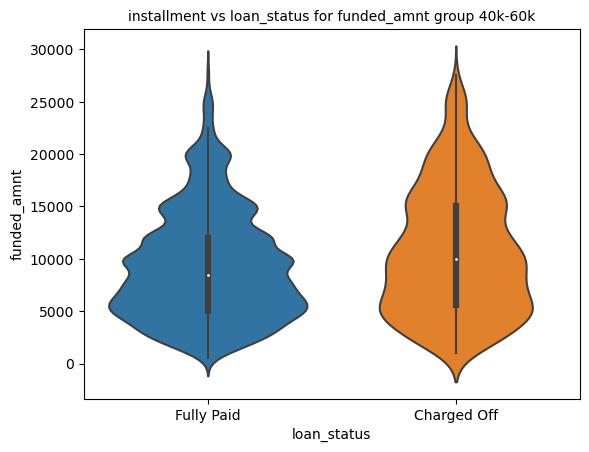

In [132]:
df_temp = df[df['annual_inc_groups'].astype('string').str.find('40000, 60000')==True]
print(df_temp[df_temp.loan_status=='Fully Paid'].funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0]))
p = sns.violinplot(data=df_temp,x='loan_status',y='funded_amnt')
p.set_title('installment vs loan_status for funded_amnt group 40k-60k',fontsize=10)

### Observations: 
### for salary groups of 40k-60k apparently more chances of failure if funded_amnt is greater than 12000

In [99]:
df.shape

(34118, 29)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34118 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             34118 non-null  int64   
 1   funded_amnt           34118 non-null  int64   
 2   funded_amnt_inv       34118 non-null  float64 
 3   term                  34118 non-null  object  
 4   int_rate              34118 non-null  float64 
 5   installment           34118 non-null  float64 
 6   grade                 34118 non-null  object  
 7   sub_grade             34118 non-null  object  
 8   emp_length            34118 non-null  object  
 9   home_ownership        34118 non-null  object  
 10  annual_inc            34118 non-null  float64 
 11  verification_status   34118 non-null  object  
 12  loan_status           34118 non-null  object  
 13  purpose               34118 non-null  object  
 14  zip_code              34118 non-null  object  
 15  addr_st